#### Importation des libreries et creation de funcion d'analyse

In [1]:
# %load C:/Users/ocon_/Sync/1_Data_analyst/inicio_.py
import pandas as pd
import numpy as np
import seaborn as sns 

import natsort as ns

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st
import statsmodels.api as sm

from datetime import datetime

import scipy.stats as stats

def decrire_table(val):
    """
    Applies dtypes, describe(), isnull().sum() and .duplicated()sum() methods to the data frame
    """
    print("-"*20)
    print(val.dtypes)
    print("-"*20)
    print(val.describe())
    print("-"*20)
    print("Number of NAN:\n",val.isnull().sum())
    print("-"*20)
    print("Number of duplicates: ", val.duplicated(keep=False).sum())

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [2]:
print('numpy version is {}'.format(np.__version__))
print('pandas version is {}'.format(pd.__version__))
print('seaborn version is {}'.format(sns.__version__))
print('natsort version is {}'.format(ns.__version__))

numpy version is 1.21.5
pandas version is 1.4.2
seaborn version is 0.11.2
natsort version is 8.1.0


In [3]:
customers = pd.read_csv("C:/Users/ocon_/Sync/1_Data_analyst/P6_ocon_jorge/P6_ocon_jorge_2/customers.csv")
products = pd.read_csv("C:/Users/ocon_/Sync/1_Data_analyst/P6_ocon_jorge/P6_ocon_jorge_2/products.csv")
transactions = pd.read_csv("C:/Users/ocon_/Sync/1_Data_analyst/P6_ocon_jorge/P6_ocon_jorge_2/transactions.csv")

customers_save = customers.copy()
transactions_save = transactions.copy()
products_save = products.copy()

 ### Nettoyage des données

#### Revision du tableau "products"

In [4]:
decrire_table(products)

--------------------
id_prod     object
price      float64
categ        int64
dtype: object
--------------------
             price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000
--------------------
Number of NAN:
 id_prod    0
price      0
categ      0
dtype: int64
--------------------
Number of duplicates:  0


In [5]:
products.loc[products['price'] <= 0, ]

,id_prod,price,categ
731,T_0,-1.0,0


In [6]:
products = products.drop([731])

#### Revision du tableau "customers"

In [7]:
decrire_table(customers)

--------------------
client_id    object
sex          object
birth         int64
dtype: object
--------------------
             birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000
--------------------
Number of NAN:
 client_id    0
sex          0
birth        0
dtype: int64
--------------------
Number of duplicates:  0


#### Revision du tableau "transactions"

In [8]:
decrire_table(transactions)

--------------------
id_prod       object
date          object
session_id    object
client_id     object
dtype: object
--------------------
       id_prod                             date session_id client_id
count   679532                           679532     679532    679532
unique    3267                           679371     342316      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      2252                               13        200     25488
--------------------
Number of NAN:
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64
--------------------
Number of duplicates:  183


In [9]:
transactions.loc[transactions['session_id'] == 's_0', ]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [10]:
transactions = transactions.loc[transactions['session_id'] != 's_0', ]
transactions['date'] = pd.to_datetime(transactions['date'], errors='raise')

In [11]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


#### Merge des trois tableaux et modifications avant analyse

In [12]:
products_transactions = products.merge(transactions, on="id_prod")
customers_achats = customers.merge(products_transactions, on="client_id")
customers_achats_save = customers_achats.copy() 

In [13]:
customers_achats_save

,client_id,sex,birth,id_prod,price,categ,date,session_id
0,c_4410,f,1967,1_385,25.99,1,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967,1_385,25.99,1,2023-02-22 01:40:22.782925,s_345108
2,c_4410,f,1967,0_1110,4.71,0,2021-11-04 16:28:30.169021,s_114715
3,c_4410,f,1967,0_1111,19.99,0,2023-02-22 01:27:49.480137,s_345108
4,c_4410,f,1967,0_1111,19.99,0,2021-03-22 01:27:49.480137,s_9707
...,...,...,...,...,...,...,...,...
679106,c_84,f,1982,0_1438,9.31,0,2022-05-29 06:11:50.316631,s_215697
679107,c_84,f,1982,0_1438,9.31,0,2022-03-29 06:11:50.316631,s_186172
679108,c_84,f,1982,1_459,15.99,1,2022-12-17 00:16:56.629536,s_313173
679109,c_84,f,1982,1_459,15.99,1,2022-02-17 00:16:56.629536,s_166337


In [14]:
def age_tranche_maker(val):
    """
    Applies a formula that gives any given age a number between 1 and 3 
    """
    x = int((val-1)*3/90)+1
    if x == 1 :
        return '18-30'
    elif x == 2:
        return '31-60'
    else:
        return '60 ou plus'
    
customers_achats["date"] = customers_achats['date'].dt.round("30min")
customers_achats['age'] = customers_achats['date'].dt.year - customers_achats['birth']
customers_achats["jour_de_la_semaine"] = customers_achats['date'].dt.day_name()
customers_achats['mois_année'] = customers_achats['date'].dt.strftime('%Y-%m')
customers_achats["Jour_du_mois"] = customers_achats['date'].dt.day

customers_achats['tranche_dage'] = [ age_tranche_maker(age) for age in customers_achats["age"]]

In [15]:
date_time_str = '22/03/01 00:00:00'

date_time_obj = datetime.strptime(date_time_str, '%y/%m/%d %H:%M:%S')

customers_achats['Année_CA'] = np.where(customers_achats['date'] <= date_time_obj , '1', '2')
#customers_achats.groupby(["Année_CA"]).date.max() #verification de la date de CA

In [16]:
customers_achats

,client_id,sex,birth,id_prod,price,categ,date,session_id,age,jour_de_la_semaine,mois_année,Jour_du_mois,tranche_dage,Année_CA
0,c_4410,f,1967,1_385,25.99,1,2021-03-22 01:30:00,s_9707,54,Monday,2021-03,22,31-60,1
1,c_4410,f,1967,1_385,25.99,1,2023-02-22 01:30:00,s_345108,56,Wednesday,2023-02,22,31-60,2
2,c_4410,f,1967,0_1110,4.71,0,2021-11-04 16:30:00,s_114715,54,Thursday,2021-11,4,31-60,1
3,c_4410,f,1967,0_1111,19.99,0,2023-02-22 01:30:00,s_345108,56,Wednesday,2023-02,22,31-60,2
4,c_4410,f,1967,0_1111,19.99,0,2021-03-22 01:30:00,s_9707,54,Monday,2021-03,22,31-60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679106,c_84,f,1982,0_1438,9.31,0,2022-05-29 06:00:00,s_215697,40,Sunday,2022-05,29,31-60,2
679107,c_84,f,1982,0_1438,9.31,0,2022-03-29 06:00:00,s_186172,40,Tuesday,2022-03,29,31-60,2
679108,c_84,f,1982,1_459,15.99,1,2022-12-17 00:30:00,s_313173,40,Saturday,2022-12,17,31-60,2
679109,c_84,f,1982,1_459,15.99,1,2022-02-17 00:30:00,s_166337,40,Thursday,2022-02,17,31-60,1


### Antoine : besoins en analytics

#### Indicateurs et graphiques autour du chiffre d'affaires

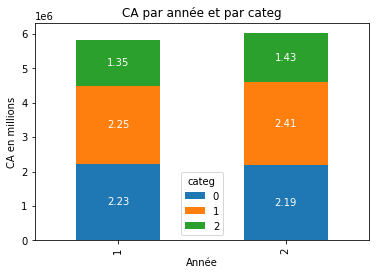

In [17]:
CA_Année = customers_achats[['price','Année_CA', 'categ']]
CA_Année = round(CA_Année.groupby(["Année_CA", 'categ']).sum(),2)
CA_Année = CA_Année.unstack()["price"]

CA_Année_plot = CA_Année.plot.bar(stacked=True)

plt.title("CA par année et par categ")
plt.xlabel("Année")
plt.ylabel("CA en millions")

labels = [round(i/1000000,2) for i in CA_Année.to_numpy().flatten(order='F')]   # Para poner las etiquetas de cantidades

for i, patch in enumerate(CA_Année_plot.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    CA_Année_plot.annotate(labels[i], (x, y), ha='center', va='center', c='white')

In [18]:
CA_Année.loc['Total',:]= CA_Année.sum(axis=0)
CA_Année.loc[:,'Total'] = CA_Année.sum(axis=1)
CA_Année

categ,0,1,2,Total
Année_CA,,,,
1,2230465.39,2247509.32,1353924.35,5831899.06
2,2189265.58,2406213.37,1426350.67,6021829.62
Total,4419730.97,4653722.69,2780275.02,11853728.68


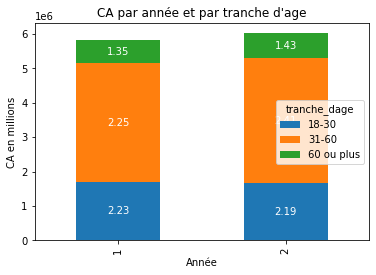

In [19]:
CA_Année_age = customers_achats[['price','Année_CA', 'tranche_dage']]
CA_Année_age = round(CA_Année_age.groupby(["Année_CA", 'tranche_dage']).sum(),2)
CA_Année_age = CA_Année_age.unstack()["price"]

CA_Année_age_plot = CA_Année_age.plot.bar(stacked=True)

plt.title("CA par année et par tranche d'age")
plt.xlabel("Année")
plt.ylabel("CA en millions")

for i, patch in enumerate(CA_Année_age_plot.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    CA_Année_age_plot.annotate(labels[i], (x, y), ha='center', va='center', c='white')

Text(0, 0.5, 'CA')

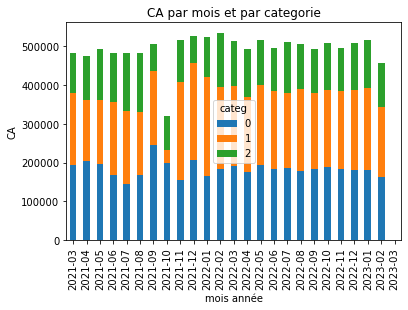

In [20]:
CA_mois_categ = customers_achats[['price','mois_année', 'categ']]
CA_mois_categ = round(CA_mois_categ.groupby(["mois_année", 'categ']).sum(),2)
CA_mois_categ = CA_mois_categ.unstack()["price"]

CA_mois_categ.plot(kind='bar', stacked=True)
plt.title("CA par mois et par categorie")
plt.xlabel("mois année")
plt.ylabel("CA")

#### Evolution dans le temps et moyenne mobile

<AxesSubplot:xlabel='mois_année'>

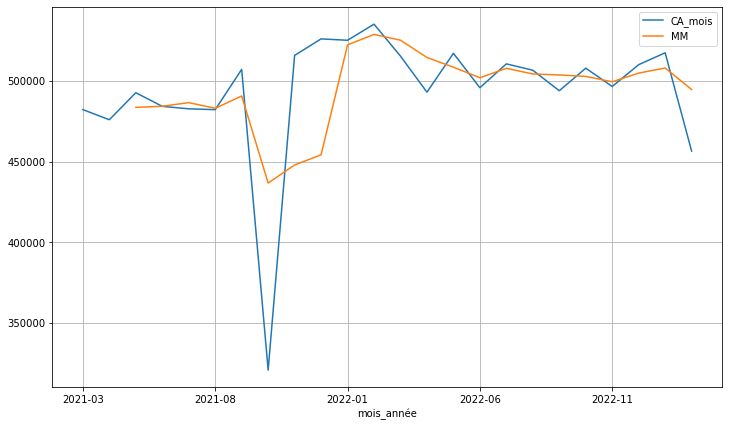

In [72]:
CA_mois = customers_achats[["price", "mois_année"]]
CA_mois = CA_mois.groupby(["mois_année"]).sum()

CA_mois["MM"] = CA_mois['price'].rolling(window=3).mean()
CA_mois = CA_mois.iloc[:-1]
CA_mois["CA_mois"] = CA_mois['price']

CA_mois[['CA_mois', 'MM']].plot(label='RELIANCE', figsize=(12,7), grid=True)

#### Zoom sur les références :

In [22]:
references_analyse = customers_achats[['id_prod', 'price', 'categ']]

effectifs = references_analyse["id_prod"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités
top_produits_table = pd.DataFrame(modalites, columns = ["id_prod"]) # création du tableau à partir des modalités
top_produits_table["n"] = effectifs.values
top_produits_table["f"] = top_produits_table["n"] / len(top_produits_table) # len(data) renvoie la taille de l'échantillon

reference_analyse_tops_flops_temp = references_analyse.groupby(['id_prod']).sum().drop(columns=['categ']).sort_values(by=['price'])
reference_analyse_tops_flops = reference_analyse_tops_flops_temp.merge(top_produits_table, on="id_prod")

In [23]:
top_10_ventes = reference_analyse_tops_flops.sort_values(by='n', ascending=False)
top_10_ventes

,id_prod,price,n,f
3258,1_369,54025.48,2252,0.689740
3243,1_417,45947.11,2189,0.670444
3254,1_414,51949.40,2180,0.667688
3251,1_498,49731.36,2128,0.651761
3228,1_425,35611.04,2096,0.641960
...,...,...,...,...
16,0_549,2.99,1,0.000306
1,0_1284,1.38,1,0.000306
456,2_23,115.99,1,0.000306
355,2_81,86.99,1,0.000306


In [24]:
top_10_CA = reference_analyse_tops_flops.sort_values(by='price', ascending=False)
top_10_CA

,id_prod,price,n,f
3264,2_159,94893.50,650,0.199081
3263,2_135,69334.95,1005,0.307810
3262,2_112,65407.76,968,0.296478
3261,2_102,60736.78,1027,0.314548
3260,2_209,56971.86,814,0.249311
...,...,...,...,...
3,0_1601,1.99,1,0.000306
5,0_541,1.99,1,0.000306
2,0_1653,1.98,2,0.000613
1,0_1284,1.38,1,0.000306


#### Profils de nos clients

Text(0.5, 1.0, 'CA par sex')

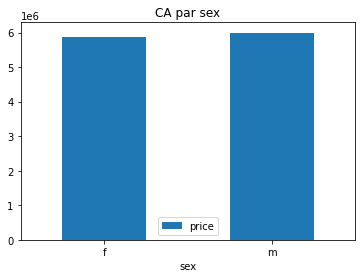

In [25]:
CA_sex = customers_achats[['price','sex']]
CA_sex = round(CA_sex.groupby(['sex']).sum(),2)
ax_sex = CA_sex.plot.bar(y='price', rot=0)
plt.title("CA par sex")

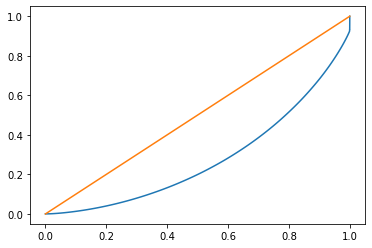

In [26]:
Lorenz_CA = customers_achats[['price','client_id']]
Lorenz_CA = round(Lorenz_CA.groupby(["client_id"]).sum(),2)

Lorenz_CA = Lorenz_CA["price"]
n = len(Lorenz_CA)
lorenz = np.cumsum(np.sort(Lorenz_CA)) / Lorenz_CA.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) 
plt.show()

In [27]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC 
gini = 2*S
gini

0.44638654137401457

In [28]:
top_clients = customers_achats[['price','client_id']]
top_clients = Lorenz_CA.groupby(["client_id"]).sum().to_frame()

top_clients.sort_values(by='price')
#indice de gini

,price
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20
...,...
c_3263,5276.87
c_3454,113637.93
c_6714,153598.92


### Julie : Comprendre le comportement de nos clients en ligne avec l'analyse bivariée

#### Le genre et les categories 

In [29]:
genre_categ = customers_achats[['sex', 'categ']]

X = "sex"
Y = "categ"

cont = customers_achats[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


In [30]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_chi2

147.11906816131497

In [31]:
st_p

3.144522803251581e-29

< 0.05 we can reject the null hypothesis and conclude there is a relationship

### Estce que le sex a une influence sur la quantité d'argent depensé par les clients ?

#### test de normalité et d’égalité des variances 

In [32]:
X = "sex" # qualitative
Y = "price" # quantitative

sex_depense = customers_achats.groupby('client_id').agg({
    'price': 'sum',
    'sex': 'first' })

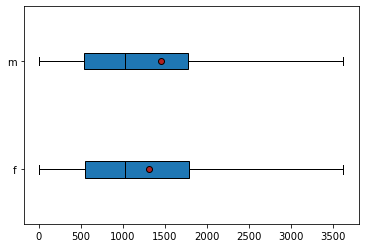

In [33]:
modalites = customers_achats[X].unique()
groupes = []
for m in modalites:
    groupes.append(sex_depense[sex_depense[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [34]:
df_f = sex_depense.loc[sex_depense["sex"] == 'f']

df_m = sex_depense.loc[sex_depense["sex"] == 'm']


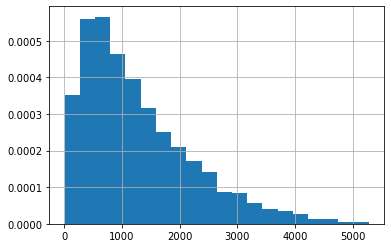

In [35]:
df_f[df_f.price < 10000]["price"].hist(density=True,bins=20)
plt.show()

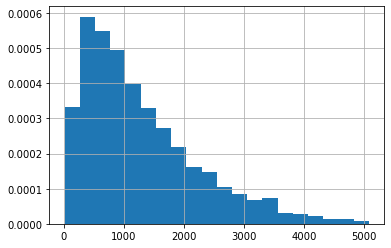

In [36]:
df_m[df_m.price < 10000]["price"].hist(density=True,bins=20)
plt.show()

In [37]:
from scipy.stats import shapiro

#### test de normalité

In [38]:
stat, p = shapiro(df_m.price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.047, p=0.000
Probably not Gaussian


In [39]:
stat, p = shapiro(df_f.price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.175, p=0.000
Probably not Gaussian


#### test d’égalité des variances

In [40]:
from scipy.stats import bartlett

In [41]:
stat, p = bartlett(df_f.price, df_m.price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Variance égale')
else:
	print('Varince non-égale ')

stat=4136.857, p=0.000
Varince non-égale 


Le test de normalité et le test d'égalité de variance ont donné un résultat negatif, un test de student ne serais donc pas pertinent pour cette ensemble des données

L'ANOVA ne peut pas etre realisé parce que les données ne suivent pas une distribution normale

#### Test non-parametrique de Man Whitneyu

In [73]:
import scipy.stats as stats

stat, p = stats.mannwhitneyu(x=df_m['price'], y=df_f['price'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Null hypothesis, significantly equal')
else:
	print('Rejet null hypothesis, significantly different')

stat=9232163.500, p=0.978
Null hypothesis, significantly equal


### Age des clients et le montant total des achats par client 

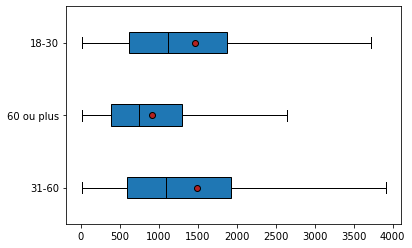

In [43]:
X = "tranche_dage" # qualitative
Y = "price" # quantitative

age_CA = customers_achats.groupby('client_id').agg({
    'price': 'sum',
    'tranche_dage': 'first'
})

modalites = customers_achats[X].unique()
groupes = []
for m in modalites:
    groupes.append(age_CA[age_CA[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

### Age des clients et la frequence d'achat 

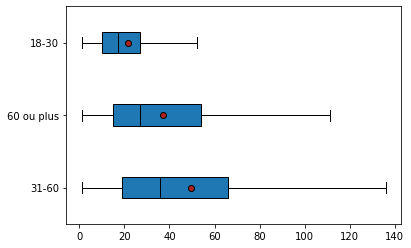

In [44]:
X = "tranche_dage" # qualitative
Y = "session_id" # quantitative

age_freq = customers_achats.groupby('client_id').agg({
    'session_id': 'nunique',
    'tranche_dage': 'first'
})

modalites = customers_achats[X].unique()
groupes = []
for m in modalites:
    groupes.append(age_freq[age_freq[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

### Age des clients et la taille du panier moyen

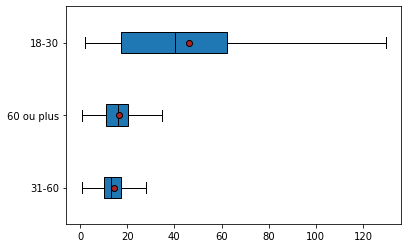

In [45]:
X = "tranche_dage" # qualitative
Y = "price" # quantitative

age_taille = customers_achats.groupby('session_id').agg({
    'price': 'mean',
    'tranche_dage': 'first'
})

modalites = customers_achats[X].unique()
groupes = []
for m in modalites:
    groupes.append(age_taille[age_taille[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

### Age des clients et la categorie des livres achetés

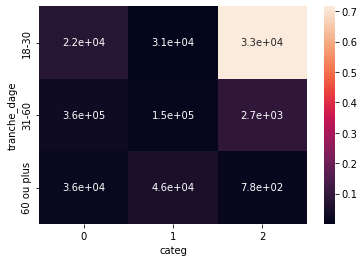

In [46]:
X2 = "tranche_dage"
Y2 = "categ"

cont = customers_achats[[X2,Y2]].pivot_table(index=X2,columns=Y2,aggfunc=len,margins=True,margins_name="Total")

import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(customers_achats)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [47]:
cont

categ,0,1,2,Total
tranche_dage,,,,
18-30,22263,31287,33005,86555
31-60,356899,149629,2703,509231
60 ou plus,36297,46253,775,83325
Total,415459,227169,36483,679111


In [82]:
print('stat=%.3f, p=%.3f' % (st_chi2, st_p))
if p > 0.05:
	print('< 0.05 we can reject the null hypothesis and conclude there is a relationship')
else:
	print('Null hypothesis, pas de relation')

stat=241635.059, p=0.000
< 0.05 we can reject the null hypothesis and conclude there is a relationship


In [48]:
st_chi2

241635.0591891023

In [49]:
st_p

0.0

< 0.05 we can reject the null hypothesis and conclude there is a relationship

### Prix des livres et chifre d'affaire par produit

In [50]:
customers_achats.head(1)

,client_id,sex,birth,id_prod,price,categ,date,session_id,age,jour_de_la_semaine,mois_année,Jour_du_mois,tranche_dage,Année_CA
0,c_4410,f,1967,1_385,25.99,1,2021-03-22 01:30:00,s_9707,54,Monday,2021-03,22,31-60,1


In [51]:
id_prod_CA_temp = customers_achats.groupby('id_prod').sum().reset_index()

id_prod_CA = id_prod_CA_temp[['id_prod', 'price']]

id_prod_prix = customers_achats[['id_prod', 'price']]

id_prod_prix_CA = id_prod_prix.merge(id_prod_CA, on="id_prod")

id_prod_prix_CA = id_prod_prix_CA.drop_duplicates()
id_prod_prix_CA = id_prod_prix_CA.drop(columns=['id_prod'])

id_prod_prix_CA = id_prod_prix_CA.rename(columns={"price_x": "price_prod", "price_y": "CA_prod"})


In [52]:
id_prod_prix_CA

,price_prod,CA_prod
0,25.99,46730.02
1798,4.71,2877.81
2409,19.99,10894.55
2954,12.99,17653.41
4313,11.21,4013.18
...,...,...
679088,42.99,171.96
679092,182.30,1093.80
679098,84.99,594.93
679105,2.99,2.99


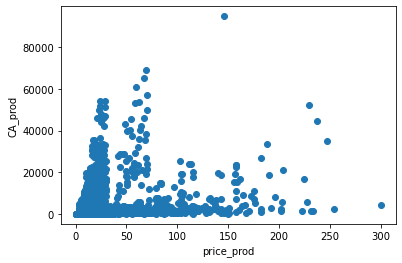

In [53]:
plt.plot(id_prod_prix_CA['price_prod'],id_prod_prix_CA['CA_prod'], "o")
plt.xlabel("price_prod")
plt.ylabel("CA_prod")
plt.show()

In [54]:
print(st.pearsonr(id_prod_prix_CA["price_prod"],id_prod_prix_CA["CA_prod"])[0])
print(np.cov(id_prod_prix_CA["price_prod"],id_prod_prix_CA["CA_prod"],ddof=0)[1,0])

0.24876748479644883
54244.36547668581


In [55]:
from scipy.stats import pearsonr

In [56]:
stat, p = pearsonr(id_prod_prix_CA.price_prod, id_prod_prix_CA.CA_prod)

In [57]:
print('stat=%.3f, p=%.3f' % (stat, p)) #p significatif different de 0 #stat force de la correlatio
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.249, p=0.000
Probably dependent


In [58]:
Y = id_prod_prix_CA['CA_prod']
X = id_prod_prix_CA[['price_prod']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['price_prod'],result.params['intercept']

print(result.params)

price_prod      61.981406
intercept     2281.789513
dtype: float64


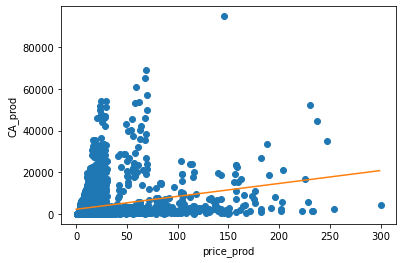

In [59]:
plt.plot(id_prod_prix_CA.price_prod,id_prod_prix_CA.CA_prod, "o")
plt.plot(np.arange(300),[a*x+b for x in np.arange(300)])
plt.xlabel("price_prod")
plt.ylabel("CA_prod")
plt.show()

price_prod      72.618337
intercept     2104.341640
dtype: float64


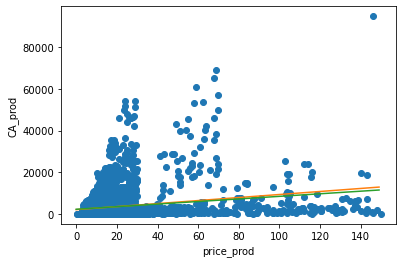

In [60]:
id_prod_prix_CA = id_prod_prix_CA.loc[id_prod_prix_CA['price_prod'] < 150, :]

Y = id_prod_prix_CA['CA_prod']
X = id_prod_prix_CA[['price_prod']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a_new,b_new = result.params['price_prod'],result.params['intercept']

print(result.params)

plt.plot(id_prod_prix_CA.price_prod,id_prod_prix_CA.CA_prod, "o")
plt.plot(np.arange(150),[a_new*x+b_new for x in np.arange(150)])
plt.plot(np.arange(150),[a*x+b for x in np.arange(150)])
plt.xlabel("price_prod")
plt.ylabel("CA_prod")
plt.show()


In [61]:
b = 2104
a = 72
X = 30
CA_prod = X*a+b
CA_prod

4264